# Vanilla Models

In this notebook, you will find the baseline models, also known as vanilla models. For the baseline models, I will run Logistic Regression, which is a basic but reliable model - it works well with binary classification?; Random Forest because I believe a Decision Tree could bring me good results but since Random Forest is a collection of Decision Trees, I can skip it and start with Random Forest; Naive Bayes, which is know for giving good results when applied to NLP; and Support Vector Machine, which is also known for working well with Natural Language Processing.

I will try the vanilla models with the datasets vectorized with CountVectorizer, TF-IDF. I will try these models with and without lemmatization. I will also iterate the best models with a train set using SMOTE. I have fixed the class imbalance manually in the <a href="https://github.com/Ismaeltrevi/hotel-reviews-analysis-using-nlp/blob/main/preprossessing/data-cleaning.ipynb">Data Cleaning</a> notebook. However, I'm curious to see if the models could have any improvement with SMOTE. I will use the `Spell_Checked` feature, since it's the cleanest one. I will not include other features from the original data set because the main objective is train a model using the reviews only.

I have a binary classification, where the target will be 0 for negative review and 1 for positive review.

## Objectives

- Preprossess the dataset creating train and test datasets
- Run models for each vectorizer used
- Find the best models for each category
- Evaluate Results

# Importing

In this section, we will import important packages and the data set we will use, which was already cleaned in the Data Cleaning notebook.

In [60]:
# Basic Packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# NLP Packages
import nltk 
from nltk.corpus import stopwords

# WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Sklearn Packages
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils import resample
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from IPython.core.display import display, HTML

# Pandas Settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Solve warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Import pickle
import pickle

## Importing DataFrame

Importing the main dataset and the lemmatized X and y variables

In [2]:
# Importing cleaned dataset as a DataFrame
df = pd.read_csv('../csv/Hotel_Review_Spell_Checked.csv', index_col=0)

In [3]:
# Checking DataFrame
df.head(2)

,Unnamed: 0.1,Hotel_Name,Negative_Review,Positive_Review,Reviewer_Score,Reviews_Clean,Score,Spell_Checked
0,185010,St James Court A Taj Hotel London,No Negative,the location was perfect,9.6,no negative the location was perfect,1,no negative the location was perfect
1,424531,H10 Metropolitan 4 Sup,Nothing,Everything was top notch staff were impeccable,10.0,nothing everything was top notch staff were ...,1,nothing everything was top notch staff were ...


### Importing Lemmatized X and Y Variables

I lemmatized the feature variable `Spell_Checked` in the <a href="https://github.com/Ismaeltrevi/hotel-reviews-analysis-using-nlp/blob/main/preprossessing/data-cleaning.ipynb">Data Cleaning</a> notebook.

In [4]:
# Importing lemmatized X and y variable
X_lem = pickle.load(open('../pickle/X_lem.pkl', 'rb'))
y_lem = pd.read_pickle('../pickle/y_lem.pkl')

# Preprocessing

In [5]:
# Importing stop_words
stop_words = stopwords.words('english')

In [6]:
# Dropping null values, if any
df.dropna(inplace=True)

## Train Test Split

As mentioned in the introduction, I will use the column `Spell_Checked` to create the features and `Score` as my target.

In [7]:
# Creating an X variable and y for my target
X = df.Spell_Checked
y = df.Score

In [8]:
# Splitting the dataset in train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Train Test Split with Lemmatization

In [9]:
# Splitting the lemmatized dataset in train set and test set
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.25, random_state=15)

## Count Vectorizer

In [10]:
# Instantiate CountVectorizer
cv = CountVectorizer(stop_words=stop_words)

# Fitting into the train and test set
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

## TF-IDF

In [11]:
# Instantiate TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words=stop_words)

# Fitting into the train and test set
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### TF-DF With Lemmatization

In [12]:
# Fitting into the lemmatized train and test set
X_train_lem = tfidf.fit_transform(X_train_lem)
X_test_lem = tfidf.transform(X_test_lem)

## Evaluation Metric

The evaluation metric below will simplify the model evaluation. My main focus is the accuracy metric. Have an accurate is important to be accurate. However, although fixing False Negatives is not crucial, I will also take a look at Recall and F1-Score to understand how my model is working. Since it is not my main focus, I will not mentioned in the individual analysis on my models.

In [13]:
# %load ../functions/evaluation.py
# Evaluation function

def evaluation(y_true, y_pred):

    print('Evaluation Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_true, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_true, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_true, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_true, y_pred)))

# Vanilla Models

In this section, I will run the Logistic Regression, Random Forest, Naive Bayes, and SVC models for the dataset that was vectorized using Count Vectorizer. Then, I will pick the three best models and move to the next section, which will be using TF-IDF.

I will also create dictionaries for each model so that I will be able to create a DataFrame with the models' results. For better visualization, I will evaluate each model by the end of each section.


<b>Note:</b> You will see that I will instantiate the same model multiple times. This will be done so that you can run each model individually, without having the run all the cells for each model.

## Modeling With Count Vectorizer

In this section, I will run the Logistic Regression, Random Forest, Naive Bayes, and SVC models for the dataset that was vectorized using Count Vectorizer. Then, I will pick the three best models and move to the next section, which will be using TF-IDF.

### Logistic Regression

In [14]:
# Instantiating baseline Logistic Regression Model
lg_baseline = LogisticRegression()

# Fitting the model to the X and y variables of the train set
lg_baseline.fit(X_train_cv, y_train)

# Predicting the model in the X variable of the test set
y_lg_base_cv = lg_baseline.predict(X_test_cv)

In [15]:
# Creating dictionary with all metrics
lr_cv_accuracy = accuracy_score(y_test, y_lg_base_cv)
lr_cv_precision = precision_score(y_test, y_lg_base_cv)
lr_cv_recall = recall_score(y_test, y_lg_base_cv)
lr_cv_f1 = f1_score(y_test, y_lg_base_cv)

metric_dict = {}
metric_dict['Baseline Logisitic Regression CV'] = {'Accuracy': lr_cv_accuracy,
                                                'Precision': lr_cv_precision,
                                                'Recall': lr_cv_recall,
                                                'F1 Score': lr_cv_f1 }

In [16]:
# Logistic Regression baseline evaluation
evaluation(y_test, y_lg_base_cv)

Evaluation Metrics:
Accuracy: 0.798149861239593
Precision: 0.8104575163398693
Recall: 0.7968582649053909
F1 Score: 0.8036003600360035


In [17]:
# Evaluation DataFrame
evaluation_df = pd.DataFrame.from_dict(metric_dict, orient='index')
evaluation_df.sort_values(by='Accuracy', ascending=False)

,Accuracy,Precision,Recall,F1 Score
Baseline Logisitic Regression CV,0.79815,0.810458,0.796858,0.8036


For the first model, Logistic Regression performed quite well with an accuracy of 0.7981. My main metric is accuracy and it seems that Logistic Regression is able to correctly understand the positive and negative reviews

### Random Forest

In [18]:
# Instantiating baseline Random Forest Model
rf_baseline = RandomForestClassifier(n_jobs=-1)

# Fitting the model to the X and y variables of the train set
rf_baseline.fit(X_train_cv, y_train)

# Predicting the model in the X variable of the test set
y_rf_cv = rf_baseline.predict(X_test_cv)

In [19]:
# Creating dictionary with all metrics
rf_cv_accuracy = accuracy_score(y_test, y_rf_cv)
rf_cv_precision = precision_score(y_test, y_rf_cv)
rf_cv_recall = recall_score(y_test, y_rf_cv)
rf_cv_f1 = f1_score(y_test, y_rf_cv)

metric_dict['Baseline Random Forest CV'] = {'Accuracy': rf_cv_accuracy,
                                                'Precision': rf_cv_precision,
                                                'Recall': rf_cv_recall,
                                                'F1 Score': rf_cv_f1 }

In [20]:
# Random Forest baseline evaluation
evaluation(y_test, y_rf_cv)

Evaluation Metrics:
Accuracy: 0.7998149861239593
Precision: 0.8385191020086649
Recall: 0.7600856836843984
F1 Score: 0.7973782771535579


Random Forest was able to do slightly better than Logistic Regression with an accuracy of 0.8031. Let's see if other models are able to perform better than that.

### Naive Bayes

In [21]:
# Instantiating baseline Naive Bayes Model
nb_base_cv = MultinomialNB(alpha = .01)

# Fitting the model to the X and y variables of the train set
nb_base_cv.fit(X_train_cv, y_train)

# Predicting the model in the X variable of the test set
y_nb_base_cv = nb_base_cv.predict(X_test_cv)

In [22]:
# Creating dictionary with all metrics
nb_cv_accuracy = accuracy_score(y_test, y_nb_base_cv)
nb_cv_precision = precision_score(y_test, y_nb_base_cv)
nb_cv_recall = recall_score(y_test, y_nb_base_cv)
nb_cv_f1 = f1_score(y_test, y_nb_base_cv)

metric_dict['Baseline Naive Bayes CV'] = {'Accuracy': nb_cv_accuracy,
                                                'Precision': nb_cv_precision,
                                                'Recall': nb_cv_recall,
                                                'F1 Score': nb_cv_f1 }

In [23]:
# Naive Bayes baseline evaluation
evaluation(y_test, y_nb_base_cv)

Evaluation Metrics:
Accuracy: 0.7811285846438483
Precision: 0.7935413642960812
Recall: 0.7807925740806855
F1 Score: 0.7871153500089977


Naive Bayes didn't perform as well as Logistic Regression and Random Forest. It's a little surprising to me, since it's well known for being one of the best models for NLP.

### SVC

In [24]:
# Instantiating baseline Naive Bayes Model
svc = SVC(kernel='linear')

# Fitting the model to the X and y variables of the train set
svc.fit(X_train_cv, y_train)

# Predicting the model in the X variable of the test set
y_pred_svc = svc.predict(X_test_cv)

In [25]:
# Creating dictionary with all metrics
svc_cv_accuracy = accuracy_score(y_test, y_pred_svc)
svc_cv_precision = precision_score(y_test, y_pred_svc)
svc_cv_recall = recall_score(y_test, y_pred_svc)
svc_cv_f1 = f1_score(y_test, y_pred_svc)

metric_dict['Baseline SVC CV'] = {'Accuracy': svc_cv_accuracy,
                                  'Precision': svc_cv_precision,
                                  'Recall': svc_cv_recall,
                                  'F1 Score': svc_cv_f1 }

In [26]:
# SVC baseline evaluation
evaluation(y_test, y_pred_svc)

Evaluation Metrics:
Accuracy: 0.7839037927844589
Precision: 0.7942342342342342
Recall: 0.7868618350589075
F1 Score: 0.7905308464849354


SVC also didn't perform as well as Logistic Regression and Random Forest. It had an accuracy of 0.7839. However, it performed better than Naive Bayes. Thus, I will run some further iterations with it.

### Evaluation

In [27]:
# Evaluation DataFrame
evaluation_df = pd.DataFrame.from_dict(metric_dict, orient='index')
evaluation_df.sort_values(by='Accuracy', ascending=False)

,Accuracy,Precision,Recall,F1 Score
Baseline Random Forest CV,0.799815,0.838519,0.760086,0.797378
Baseline Logisitic Regression CV,0.798150,0.810458,0.796858,0.803600
Baseline SVC CV,0.783904,0.794234,0.786862,0.790531
Baseline Naive Bayes CV,0.781129,0.793541,0.780793,0.787115


We can see that all the models performed quite well for baseline models. The three best models were Random Forest, Logistic Regression, and SVC. Naive Bayes did a good job as well, but it under performed if compared to the other models in the accuracy metric, which is my focus for this project.

It is interesting to see that Logistic Regression performed in second place between these baseline models. It tells us that although not usually seen as a powerful model, it holds it's surprises.

## Modeling with TF-IDF

In this section, I will see how each of the three best models in the previous section performs when using the TF-IDF vectorizer. Too keep each to read, the evaluations will be at the end of this section.

### Logistic Regression

In [28]:
# Instantiating baseline Logistic Regression Model
lg_baseline = LogisticRegression()

# Fitting the model to the X and y variables of the train set
lg_baseline.fit(X_train_tfidf, y_train) 

# Predicting the model in the X variable of the test set
y_lg_base_tfidf = lg_baseline.predict(X_test_tfidf)

In [29]:
# Creating dictionary with all metrics
lg_tfidf_accuracy = accuracy_score(y_test, y_lg_base_tfidf)
lg_tfidf_precision = precision_score(y_test, y_lg_base_tfidf)
lg_tfidf_recall = recall_score(y_test, y_lg_base_tfidf)
lg_tfidf_f1 = f1_score(y_test, y_lg_base_tfidf)

metric_dict['Baseline Logistic Regression TF-IDF'] = {'Accuracy': lg_tfidf_accuracy,
                                                'Precision': lg_tfidf_precision,
                                                'Recall': lg_tfidf_recall,
                                                'F1 Score': lg_tfidf_f1 }

In [30]:
# Logistic Regression TF-IDF baseline evaluation
evaluation(y_test, y_lg_base_tfidf)

Evaluation Metrics:
Accuracy: 0.8170212765957446
Precision: 0.8481936971560338
Recall: 0.7879328811138879
F1 Score: 0.8169535443272257


We can see an improvement with Logistic Regressing and TF-IDF. The accuracy improved from 0.7981 to 0.8170.

### Random Forest 

In [31]:
# Instantiating baseline Logistic Regression Model
rf_baseline = RandomForestClassifier()

# Fitting the model to the X and y variables of the train set
rf_baseline.fit(X_train_tfidf, y_train)

# Predicting the model in the X variable of the test set
y_rf_base_tfidf = rf_baseline.predict(X_test_tfidf)

In [32]:
# Creating dictionary with all metrics
rf_tfidf_accuracy = accuracy_score(y_test, y_rf_base_tfidf)
rf_tfidf_precision = precision_score(y_test, y_rf_base_tfidf)
rf_tfidf_recall = recall_score(y_test, y_rf_base_tfidf)
rf_tfidf_f1 = f1_score(y_test, y_rf_base_tfidf)

metric_dict['Baseline Random Forest TF-IDF'] = {'Accuracy': rf_tfidf_accuracy,
                                                'Precision': rf_tfidf_precision,
                                                'Recall': rf_tfidf_recall,
                                                'F1 Score': rf_tfidf_f1 }

In [33]:
# Logistic Regression TF-IDF baseline evaluation
evaluation(y_test, y_rf_base_tfidf)

Evaluation Metrics:
Accuracy: 0.796854764107308
Precision: 0.8382995629717919
Recall: 0.7533023920028561
F1 Score: 0.793531402783001


Random Forest with TF-IDF also performed slightly better than when I tried it with Count Vectorizer

### SVC

In [34]:
# Instantiating baseline SVC Model
svc = SVC(kernel='rbf')

# Fitting the model to the X and y variables of the train set
svc.fit(X_train_tfidf, y_train)

# Predicting the model in the X variable of the test set
y_pred_svc_tfidf = svc.predict(X_test_tfidf)

In [35]:
# Creating dictionary with all metrics
svc_tfidf_accuracy = accuracy_score(y_test, y_pred_svc_tfidf)
svc_tfidf_precision = precision_score(y_test, y_pred_svc_tfidf)
svc_tfidf_recall = recall_score(y_test, y_pred_svc_tfidf)
svc_tfidf_f1 = f1_score(y_test, y_pred_svc_tfidf)

metric_dict['Baseline SVC TF-IDF'] = {'Accuracy': svc_tfidf_accuracy,
                                                'Precision': svc_tfidf_precision,
                                                'Recall': svc_tfidf_recall,
                                                'F1 Score': svc_tfidf_f1 }

In [36]:
# SVC TF-IDF baseline evaluation
evaluation(y_test, y_pred_svc_tfidf)

Evaluation Metrics:
Accuracy: 0.8222016651248844
Precision: 0.8622047244094488
Recall: 0.7818636201356658
F1 Score: 0.8200711477251451


SVC had a good improvement in accuracy. It went from 0.7839 to 0.8222. It is the best model so far.

### Evaluation

In [37]:
# Evaluation DataFrame
evaluation_df = pd.DataFrame.from_dict(metric_dict, orient='index')
evaluation_df.sort_values(by='Accuracy', ascending=False)

,Accuracy,Precision,Recall,F1 Score
Baseline SVC TF-IDF,0.822202,0.862205,0.781864,0.820071
Baseline Logistic Regression TF-IDF,0.817021,0.848194,0.787933,0.816954
Baseline Random Forest CV,0.799815,0.838519,0.760086,0.797378
Baseline Logisitic Regression CV,0.798150,0.810458,0.796858,0.803600
Baseline Random Forest TF-IDF,0.796855,0.838300,0.753302,0.793531
Baseline SVC CV,0.783904,0.794234,0.786862,0.790531
Baseline Naive Bayes CV,0.781129,0.793541,0.780793,0.787115


Here we can see that all the models using TF-IDF had a better performance than the models using CountVectorizer. SVC model had an big improvement compared to other models and Logistic Regression was able to perform better than Random Forest, which is surprising. The model that had the lowest improvement was Random Forest, which we can see that it changed very little.

I will now test these three models with the lemmatized dataset and see if there is any improvement.

## TF-IDF With Lemmatization

In this section, we will try the three best models using the lemmatized variable.

### Logistic Regression

In [38]:
# Instantiating baseline Logistic Regression Model
lr_baseline = LogisticRegression(random_state=1)

# Fitting the model to the X and y variables of the train set
lr_baseline.fit(X_train_lem, y_train_lem) 

# Predicting the model in the X variable of the test set
y_lr_base_tfidf_lem = lr_baseline.predict(X_test_lem)

In [39]:
# Creating dictionary with all metrics
lr_lem_accuracy = accuracy_score(y_test_lem, y_lr_base_tfidf_lem)
lr_lem_precision = precision_score(y_test_lem, y_lr_base_tfidf_lem)
lr_lem_recall = recall_score(y_test_lem, y_lr_base_tfidf_lem)
lr_lem_f1 = f1_score(y_test_lem, y_lr_base_tfidf_lem)

metric_dict['Baseline Logistic Regression Lem'] = {'Accuracy': lr_lem_accuracy,
                                                'Precision': lr_lem_precision,
                                                'Recall': lr_lem_recall,
                                                'F1 Score': lr_lem_f1 }

In [41]:
# Logistic Regression TF-IDF baseline evaluation
evaluation(y_test_lem, y_lr_base_tfidf_lem)

Evaluation Metrics:
Accuracy: 0.8177613320999075
Precision: 0.8314990512333966
Recall: 0.8019765739385066
F1 Score: 0.8164710266443078


This iteration performed slightly better than the iteration without lemmatization: 0.81777 vs 0.81770. However, it's insignificant. Thus, I'll consider  the precision metric to decide which model will move forward. In this case, it will be the model without lemmatizaiton.

### Random Forest

In [42]:
# Instantiating baseline Random Forest Model
rf_baseline = RandomForestClassifier(random_state=1)

# Fitting the model to the X and y variables of the train set
rf_baseline.fit(X_train_lem, y_train_lem) 

# Predicting the model in the X variable of the test set
y_rf_base_lem = rf_baseline.predict(X_test_lem)

In [43]:
# Creating dictionary with all metrics
rf_lem_accuracy = accuracy_score(y_test_lem, y_rf_base_lem)
rf_lem_precision = precision_score(y_test_lem, y_rf_base_lem)
rf_lem_recall = recall_score(y_test_lem, y_rf_base_lem)
rf_lem_f1 = f1_score(y_test_lem, y_rf_base_lem)

metric_dict['Baseline Random Forest Lem'] = {'Accuracy': rf_lem_accuracy,
                                                'Precision': rf_lem_precision,
                                                'Recall': rf_lem_recall,
                                                'F1 Score': rf_lem_f1 }

In [44]:
# Logistic Regression TF-IDF baseline evaluation
evaluation(y_test_lem, y_rf_base_lem)

Evaluation Metrics:
Accuracy: 0.7988899167437558
Precision: 0.8196657598134474
Recall: 0.7719619326500732
F1 Score: 0.7950989632422243


Random Forest with lemmatization is the best model so far with an accuracy of 0.8231 and 0.8048 without lemmatization.

### SVC

In [45]:
# Instantiating baseline SVC Model
svc = SVC(kernel='rbf')

# Fitting the model to the X and y variables of the train set
svc.fit(X_train_lem, y_train_lem)

# Predicting the model in the X variable of the test set
y_pred_svc_lem = svc.predict(X_test_lem)

In [46]:
# Creating dictionary with all metrics
svc_lem_accuracy = accuracy_score(y_test_lem, y_pred_svc_lem)
svc_lem_precision = precision_score(y_test_lem, y_pred_svc_lem)
svc_lem_recall = recall_score(y_test_lem, y_pred_svc_lem)
svc_lem_f1 = f1_score(y_test_lem, y_pred_svc_lem)

metric_dict['Baseline Random Forest Lem'] = {'Accuracy': svc_lem_accuracy,
                                                'Precision': svc_lem_precision,
                                                'Recall': svc_lem_recall,
                                                'F1 Score': svc_lem_f1 }

In [47]:
# SCV TF-IDF baseline evaluation
evaluation(y_test_lem, y_pred_svc_lem)

Evaluation Metrics:
Accuracy: 0.8231267345050879
Precision: 0.8493312352478364
Recall: 0.7902635431918009
F1 Score: 0.8187334091770953


### Evaluation

In [48]:
# Evaluation DataFrame
evaluation_df = pd.DataFrame.from_dict(metric_dict, orient='index')
evaluation_df.sort_values(by='Accuracy', ascending=False)

,Accuracy,Precision,Recall,F1 Score
Baseline Random Forest Lem,0.823127,0.849331,0.790264,0.818733
Baseline SVC TF-IDF,0.822202,0.862205,0.781864,0.820071
Baseline Logistic Regression Lem,0.817761,0.831499,0.801977,0.816471
Baseline Logistic Regression TF-IDF,0.817021,0.848194,0.787933,0.816954
Baseline Random Forest CV,0.799815,0.838519,0.760086,0.797378
Baseline Logisitic Regression CV,0.798150,0.810458,0.796858,0.803600
Baseline Random Forest TF-IDF,0.796855,0.838300,0.753302,0.793531
Baseline SVC CV,0.783904,0.794234,0.786862,0.790531
Baseline Naive Bayes CV,0.781129,0.793541,0.780793,0.787115


We can see that Random Forest is our best model so far compared to all the previous model. However, the baseline SVC model using TF-IDF is very close to it with a higher precision and higher F1 Score. They aren't my main focus when it comes to metrics, but I might take in consideration when choosing the best model.

## SMOTE

I fixed the class imbalance manually. However, I'm curious to see how my best models will behave using SMOTE. For this reason I'll run two of my best models and see how it would perform with SMOTE.

### Train Test Split

In [49]:
smote = SMOTE()
X_train_smote_lem, y_train_smote_lem = smote.fit_sample(X_train_lem, y_train_lem) 

smote = SMOTE()
X_train_smote_tfidf, y_train_smote_tfidf = smote.fit_sample(X_train_tfidf, y_train) 

In [50]:
# Instantiating baseline Random Forest Model
rf_base_lem_tfidf = RandomForestClassifier(random_state=1)

# Fitting the model to the X and y variables of the train set
rf_base_lem_tfidf.fit(X_train_smote_lem, y_train_smote_lem)

# Predicting the model in the X variable of the test set### Random Forest
y_rf_base_lem_tfidf_smote = rf_base_lem_tfidf.predict(X_test_lem)

In [51]:
# Creating dictionary with all metrics
rf_smote_accuracy = accuracy_score(y_test_lem, y_rf_base_lem_tfidf_smote)
rf_smote_precision = precision_score(y_test_lem, y_rf_base_lem_tfidf_smote)
rf_smote_recall = recall_score(y_test_lem, y_rf_base_lem_tfidf_smote)
rf_smote_f1 = f1_score(y_test_lem, y_rf_base_lem_tfidf_smote)

metric_dict['Baseline Random Forest SMOTE'] = {'Accuracy': rf_smote_accuracy,
                                                'Precision': rf_smote_precision,
                                                'Recall': rf_smote_recall,
                                                'F1 Score': rf_smote_f1 }

In [52]:
evaluation(y_test_lem, y_rf_base_lem_tfidf_smote)

Evaluation Metrics:
Accuracy: 0.8003700277520814
Precision: 0.8291517323775388
Recall: 0.7620790629575402
F1 Score: 0.7942017928666795


Random Forest did not perform any better using SMOTE

## SVC

In [53]:
svc = SVC(kernel='rbf')
svc.fit(X_train_smote_tfidf, y_train_smote_tfidf)
y_pred_svc_smote = svc.predict(X_test_tfidf)

In [54]:
# Creating dictionary with all metrics
svc_smote_accuracy = accuracy_score(y_test, y_pred_svc_smote)
svc_smote_precision = precision_score(y_test, y_pred_svc_smote)
svc_smote_recall = recall_score(y_test, y_pred_svc_smote)
svc_smote_f1 = f1_score(y_test, y_pred_svc_smote)

metric_dict['Baseline SVC SMOTE'] = {'Accuracy': svc_smote_accuracy,
                                                'Precision': svc_smote_precision,
                                                'Recall': svc_smote_recall,
                                                'F1 Score': svc_smote_f1 }

In [55]:
evaluation(y_test, y_pred_svc_smote)

Evaluation Metrics:
Accuracy: 0.8223866790009251
Precision: 0.863690241011458
Recall: 0.7804355587290254
F1 Score: 0.8199549887471868


### Evaluation

In [56]:
# Evaluation DataFrame
evaluation_df = pd.DataFrame.from_dict(metric_dict, orient='index')
evaluation_df.sort_values(by='Accuracy', ascending=False)

,Accuracy,Precision,Recall,F1 Score
Baseline Random Forest Lem,0.823127,0.849331,0.790264,0.818733
Baseline SVC SMOTE,0.822387,0.863690,0.780436,0.819955
Baseline SVC TF-IDF,0.822202,0.862205,0.781864,0.820071
Baseline Logistic Regression Lem,0.817761,0.831499,0.801977,0.816471
Baseline Logistic Regression TF-IDF,0.817021,0.848194,0.787933,0.816954
Baseline Random Forest SMOTE,0.800370,0.829152,0.762079,0.794202
Baseline Random Forest CV,0.799815,0.838519,0.760086,0.797378
Baseline Logisitic Regression CV,0.798150,0.810458,0.796858,0.803600
Baseline Random Forest TF-IDF,0.796855,0.838300,0.753302,0.793531
Baseline SVC CV,0.783904,0.794234,0.786862,0.790531


We can see the SMOTE was able to improve the accuracy metric by a very small different. However, Recall and F1 Score dropped, which tells me that the model is not as good as the version without SMOTE.

# Evaluation

In [57]:
# Evaluation DataFrame
evaluation_df = pd.DataFrame.from_dict(metric_dict, orient='index')
evaluation_df.sort_values(by='Accuracy', ascending=False)

,Accuracy,Precision,Recall,F1 Score
Baseline Random Forest Lem,0.823127,0.849331,0.790264,0.818733
Baseline SVC SMOTE,0.822387,0.863690,0.780436,0.819955
Baseline SVC TF-IDF,0.822202,0.862205,0.781864,0.820071
Baseline Logistic Regression Lem,0.817761,0.831499,0.801977,0.816471
Baseline Logistic Regression TF-IDF,0.817021,0.848194,0.787933,0.816954
Baseline Random Forest SMOTE,0.800370,0.829152,0.762079,0.794202
Baseline Random Forest CV,0.799815,0.838519,0.760086,0.797378
Baseline Logisitic Regression CV,0.798150,0.810458,0.796858,0.803600
Baseline Random Forest TF-IDF,0.796855,0.838300,0.753302,0.793531
Baseline SVC CV,0.783904,0.794234,0.786862,0.790531


After running multiple baseline models, we were able to verify a few points:
- Our best model was a Random Forest using lemmatized words. However, the F1 score was lower than other models. Since I will focus on F1 Score further in this project, the winner was SVC using TF-IDF. 
- Random Forest, CVC, and Logistic Regression are the best models to use in NLP in these cases
- TF-IDF was able improve all all our models.
- Naive Bayes was our worst model.

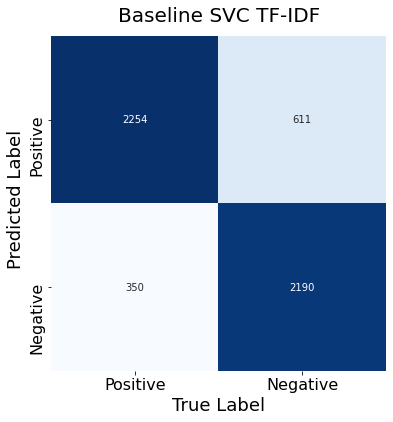

In [95]:
# Plotting a confusion matrix
plt.figure(figsize=(6, 7))
mat = confusion_matrix(y_test, y_pred_svc_tfidf)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'], cmap="Blues")
plt.xlabel('True Label', fontsize= 18)
plt.ylabel('Predicted Label', fontsize= 18)
plt.title('Baseline SVC TF-IDF', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
b, t = plt.ylim() 
t -= 0.05 
plt.ylim(b, t) 
plt.savefig('../images/confusion-matrix-baseline-model.png', bbox_inches = "tight", pad_inches=.5, dpi=300)
plt.show()

We can see above that my model was able to predict correctly 84.47% of the positive reviews and 72.10% of the negative reviews. This means that I need to improve my model's ability to better predict negative reviews.

# Ensemble Models

Now, with my best models in mind, I will run a few ensemble models in the <a href="https://github.com/Ismaeltrevi/hotel-reviews-analysis-using-nlp/blob/main/models/ensemble-models.ipynb">Data Cleaning</a>.

# Pickle Files

Pickling files for further use.

In [ ]:
# Pickling Train Set - Features
pickle_out = open("../pickle/vanilla_model_evaluation.pkl",'wb')
pickle.dump(evaluation_df, pickle_out)
pickle_out.close()

In [ ]:
# Pickling Train Set - Features
pickle_out = open("../pickle/X_train_tfidf.pkl",'wb')
pickle.dump(X_train_tfidf, pickle_out)
pickle_out.close()

In [ ]:
# Pickling Test Set - Features
pickle_out = open("../pickle/X_test_tfidf.pkl",'wb')
pickle.dump(X_test_tfidf, pickle_out)
pickle_out.close()

In [ ]:
# Pickling Train and Test Set  Target
y_train.to_pickle("../pickle/y_train.pkl")
y_test.to_pickle("../pickle/y_test.pkl")

In [ ]:
# Pickling Train Set - Features
pickle_out = open("../pickle/X_train_lem.pkl",'wb')
pickle.dump(X_train_lem, pickle_out)
pickle_out.close()

In [ ]:
# Pickling Test Set - Features
pickle_out = open("../pickle/X_test_lem.pkl",'wb')
pickle.dump(X_test_lem, pickle_out)
pickle_out.close()

In [ ]:
# Pickling Train and Test Set - Target
y_train_lem.to_pickle("../pickle/y_train_lem.pkl")
y_test_lem.to_pickle("../pickle/y_test_lem.pkl")